In [1]:
#! pip install networkx
#! pip install openpyxl

In [2]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import nltk
#nltk.download('punkt')
import re
#nltk.download('stopwords') 
import matplotlib.pyplot as plt

from nltk.tokenize import sent_tokenize

from nltk.corpus import stopwords

from sklearn.metrics.pairwise import cosine_similarity

import networkx as nx

# Étape 1: Importer les données #

In [3]:
# reading the file
df = pd.read_excel('TASK.xlsx')

In [4]:
df

,TEST DATASET,Unnamed: 1
0,NaN,Introduction
1,NaN,Acnesol Gel is an antibiotic that fights bacte...
2,NaN,Ambrodil Syrup is used for treating various re...
3,NaN,Augmentin 625 Duo Tablet is a penicillin-type ...
4,NaN,Azithral 500 Tablet is an antibiotic used to t...
...,...,...
996,NaN,Azapure Tablet belongs to a group of medicines...
997,NaN,Arimidex 1mg Tablet is used alone or with oth...
998,NaN,Arpimune ME 100mg Capsule is used to prevent y...
999,NaN,Amlodac CH Tablet is a combination medicine us...


In [5]:
df.columns

Index(['TEST DATASET', 'Unnamed: 1'], dtype='object')

# Étape 2: Prétraitement des données #

In [6]:
df.rename(columns = {'Unnamed: 1' : 'Introduction' }, inplace=True)
# Deleting the first row 
df.drop(0)

,TEST DATASET,Introduction
1,NaN,Acnesol Gel is an antibiotic that fights bacte...
2,NaN,Ambrodil Syrup is used for treating various re...
3,NaN,Augmentin 625 Duo Tablet is a penicillin-type ...
4,NaN,Azithral 500 Tablet is an antibiotic used to t...
5,NaN,Alkasol Oral Solution is a medicine used in th...
...,...,...
996,NaN,Azapure Tablet belongs to a group of medicines...
997,NaN,Arimidex 1mg Tablet is used alone or with oth...
998,NaN,Arpimune ME 100mg Capsule is used to prevent y...
999,NaN,Amlodac CH Tablet is a combination medicine us...


# Étape 3:Word Embeddings #

In [7]:
# Extract word vectors
word_embeddings = {}
file = open('glove.6B.100d.txt', encoding='utf-8')
for line in file:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
file.close()
len(word_embeddings)

400000

# Étape 3: Entraînement du modèle #

In [8]:
# Converting the DataFrame into a dictionary
text_dictionary = {}
for i in range(1,len(df['TEST DATASET'])):
    text_dictionary[i] = df['Introduction'][i]
    
print(text_dictionary[1])

Acnesol Gel is an antibiotic that fights bacteria. It is used to treat acne, which appears as spots or pimples on your face, chest or back. This medicine works by attacking the bacteria that cause these pimples.Acnesol Gel is only meant for external use and should be used as advised by your doctor. You should normally wash and dry the affected area before applying a thin layer of the medicine. It should not be applied to broken or damaged skin. Avoid any contact with your eyes, nose, or mouth. Rinse it off with water if you accidentally get it in these areas. It may take several weeks for your symptoms to improve, but you should keep using this medicine regularly. Do not stop using it as soon as your acne starts to get better. Ask your doctor when you should stop treatment.Common side effects like minor itching, burning, or redness of the skin and oily skin may be seen in some people. These are usually temporary and resolve on their own. Consult your doctor if they bother you or do not

In [9]:
# function to remove stopwords
def remove_stopwords(sen):
    stop_words = stopwords.words('english')
    
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [10]:
# function to make vectors out of the sentences
def sentence_vector_func (sentences_cleaned) : 
    sentence_vector = []
    for i in sentences_cleaned:
        if len(i) != 0:
            v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
        else:
            v = np.zeros((100,))
        sentence_vector.append(v)
    
    return (sentence_vector)

# Étape 4:Text Summarization Algorithm #

In [11]:
# function to get the summary of the articles

def summary_text (test_text, n = 5):
    sentences = []
    
    # tokenising the text 
    sentences.append(sent_tokenize(test_text))
    
    sentences = [y for x in sentences for y in x] # flatten list
    
    
    # remove punctuations, numbers and special characters
    clean_sentences = pd.Series(sentences).str.replace("[^a-z A-Z 0-9]", " ")

    # make alphabets lowercase
    clean_sentences = [s.lower() for s in clean_sentences]
   

    
    # remove stopwords from the sentences
    clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]
    
    
    sentence_vectors = sentence_vector_func(clean_sentences)
    
    # similarity matrix
    sim_mat = np.zeros([len(sentences), len(sentences)])
   
    # Finding the similarities between the sentences 
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            if i != j:
                sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]
    
    
    nx_graph = nx.from_numpy_array(sim_mat)
    scores = nx.pagerank(nx_graph)
    
    ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)))
    # Extract sentences as the summary
    summarised_string = ''
    for i in range(n):
        
        try:
            summarised_string = summarised_string + str(ranked_sentences[i][1])            
        except IndexError:
            print ("Summary Not Available")
    
    return (summarised_string)

In [12]:
print("Kindly let me know in how many sentences you want the summary - ")
x = int(input())

summary_dictionary = {}

for key in text_dictionary:
    
    para = text_dictionary[key]
    print("Summary of the article - ",key)
    summary = summary_text(para,x)
    summary_dictionary[key] = summary
    
    print(summary)
    print('='*120) 
    
    if key >= 4:  # Stop after the first 5 key-value pairs
        break
    
print ("*"*40,"The process has been completed successfully","*"*40)

Kindly let me know in how many sentences you want the summary - 


 3


Summary of the article -  1
Acnesol Gel is an antibiotic that fights bacteria.These are usually temporary and resolve on their own.Consult your doctor about using this medicine if you are pregnant or breastfeeding.
Summary of the article -  2
Ambrodil Syrup is used for treating various respiratory tract disorders associated with excessive mucus.It works by thinning and loosens mucus in the nose, windpipe and lungs and make it easier to cough out.Ambrodil Syrup should be taken with food.For better results, it is suggested to take it at the same time every day.
Summary of the article -  3
It is used to treat infections of the lungs (e.g., pneumonia), ear, nasal sinus, urinary tract, skin and soft tissue.You should take it regularly at evenly spaced intervals as per the schedule prescribed by your doctor.Augmentin 625 Duo Tablet is a penicillin-type of antibiotic that helps your body fight infections caused by bacteria.
Summary of the article -  4


C:\Users\megdiche leila\AppData\Local\Temp\ipykernel_2564\3308548730.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_sentences = pd.Series(sentences).str.replace("[^a-z A-Z 0-9]", " ")
C:\Users\megdiche leila\AppData\Local\Temp\ipykernel_2564\3308548730.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_sentences = pd.Series(sentences).str.replace("[^a-z A-Z 0-9]", " ")
C:\Users\megdiche leila\AppData\Local\Temp\ipykernel_2564\3308548730.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_sentences = pd.Series(sentences).str.replace("[^a-z A-Z 0-9]", " ")
C:\Users\megdiche leila\AppData\Local\Temp\ipykernel_2564\3308548730.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_sentences = pd.Series(sentences).str.replace("[^a-z A-Z 0-9]", " ")


These are usually temporary and subside with the completion of treatment.It should be used regularly at evenly spaced time intervals as prescribed by your doctor.Pregnant or breastfeeding women should consult their doctor before using this medicine.
**************************************** The process has been completed successfully ****************************************


In [13]:
summary_table = pd.DataFrame(list(summary_dictionary.items()),columns = ['TEST DATASET','Summary'])

In [14]:
data_table = pd.DataFrame(list(text_dictionary.items()),columns = ['TEST DATASET','Introduction'])

In [15]:
# Combining the findings into the table
result  = pd.concat([data_table , summary_table['Summary']], axis = 1 , sort = False)
result

,TEST DATASET,Introduction,Summary
0,1,Acnesol Gel is an antibiotic that fights bacte...,Acnesol Gel is an antibiotic that fights bacte...
1,2,Ambrodil Syrup is used for treating various re...,Ambrodil Syrup is used for treating various re...
2,3,Augmentin 625 Duo Tablet is a penicillin-type ...,It is used to treat infections of the lungs (e...
3,4,Azithral 500 Tablet is an antibiotic used to t...,These are usually temporary and subside with t...
4,5,Alkasol Oral Solution is a medicine used in th...,NaN
...,...,...,...
995,996,Azapure Tablet belongs to a group of medicines...,NaN
996,997,Arimidex 1mg Tablet is used alone or with oth...,NaN
997,998,Arpimune ME 100mg Capsule is used to prevent y...,NaN
998,999,Amlodac CH Tablet is a combination medicine us...,NaN


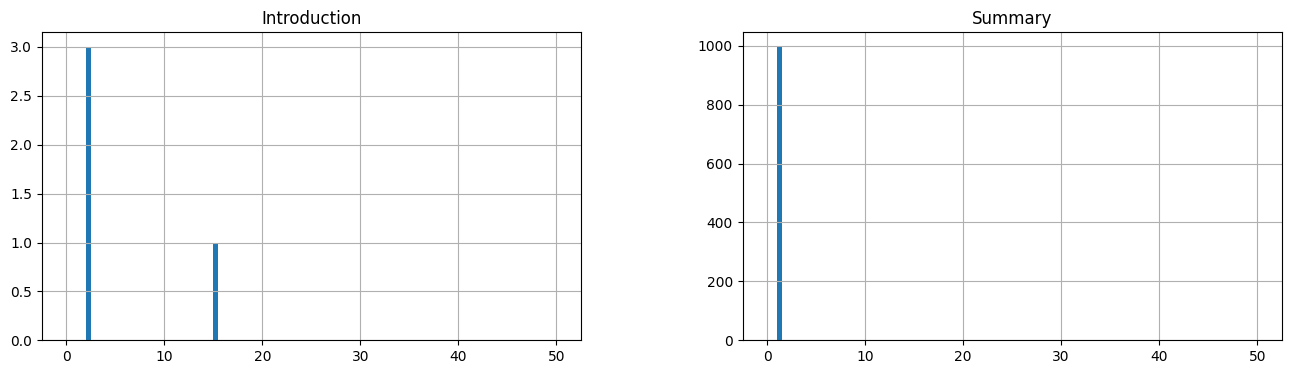

In [16]:
text_count = [len(str(sentence).split()) for sentence in result.Introduction]
summary_count = [len(str(sentence).split()) for sentence in result.Summary]

result_df = pd.DataFrame({'Introduction': text_count, 'Summary': summary_count})
result_df.hist(bins=100, figsize=(16, 4), range=[0, 50])
plt.show()

In [17]:
# Saving it to a file
result.to_csv("Summary_File.csv")

# Étape 5: User interface #

In [18]:
import tkinter as tk
from tkinter import scrolledtext
from tkinter import messagebox

In [19]:

def summarize_text():
    input_text = input_text_area.get("2.0", tk.END).strip()
    
    if input_text:
        summary = summary_text(input_text)
        summary_output_area.configure(state="normal")
        summary_output_area.delete("2.0", tk.END)
        summary_output_area.insert(tk.END, summary)
        summary_output_area.configure(state="disabled")
    else:
        messagebox.showwarning("Warning", "Please enter some text.")

In [ ]:
root = tk.Tk()
root.title("Text Summarization")
root.geometry("1000x600")

input_label = tk.Label(root, text="Input Text:")
input_label.pack()

input_text_area = scrolledtext.ScrolledText(root, height=8)
input_text_area.pack()

summary_label = tk.Label(root, text="Summary:")
summary_label.pack()

summary_output_area = scrolledtext.ScrolledText(root, height=8, state="disabled")
summary_output_area.pack()

summarize_button = tk.Button(root, text="Summarize", command=summarize_text)
summarize_button.pack()

root.mainloop()